In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", None) # view all cols

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Prepare

### Get team name

In [2]:
dict_name = {}
with open('full_name.txt', 'r') as f:
    for line in f:
        name = line.split(',') # [short_name, full_name]
        dict_name[name[0]] = name[1].strip()
dict_name

{'GSW': 'Golden State Warriors',
 'OKC': 'Oklahoma City Thunder',
 'SAC': 'Sacramento Kings',
 'HOU': 'Houston Rockets',
 'BOS': 'Boston Celtics',
 'POR': 'Portland Trail Blazers',
 'LAC': 'Los Angeles Clippers',
 'CLE': 'Cleveland Cavaliers',
 'WAS': 'Washington Wizards',
 'SAS': 'San Antonio Spurs',
 'CHO': 'Charlotte Hornets',
 'ATL': 'Atlanta Hawks',
 'TOR': 'Toronto Raptors',
 'NOP': 'New Orleans Pelicans',
 'MIN': 'Minnesota Timberwolves',
 'DAL': 'Dallas Mavericks',
 'IND': 'Indiana Pacers',
 'ORL': 'Orlando Magic',
 'DET': 'Detroit Pistons',
 'DEN': 'Denver Nuggets',
 'CHI': 'Chicago Bulls',
 'PHO': 'Phoenix Suns',
 'MIA': 'Miami Heat',
 'MEM': 'Memphis Grizzlies',
 'MIL': 'Milwaukee Bucks',
 'BRK': 'Brooklyn Nets',
 'NYK': 'New York Knicks',
 'UTA': 'Utah Jazz',
 'PHI': 'Philadelphia 76ers',
 'LAL': 'Los Angeles Lakers'}

### Get column description

In [3]:
with open('raw_description.txt', 'r') as f:
    print(f.read())

Date : Date
H_Rk : Home Rank
H_Team : Home Team
H_G : Home Games
H_MP : Home Minutes Played
H_FG : Home Field Goals
H_FGA : Home Field Goal Attempts
H_FG% : Home Field Goal Percentage
H_3P : Home 3-Point Field Goals
H_3PA : Home 3-Point Field Goal Attempts
H_3P% : Home 3-Point Field Goal Percentage
H_2P : Home 2-Point Field Goals
H_2PA : Home 2-point Field Goal Attempts
H_2P% : Home 2-Point Field Goal Percentage
H_FT : Home Free Throws
H_FTA : Home Free Throw Attempts
H_FT% : Home Free Throw Percentage
H_ORB : Home Offensive Rebounds
H_DRB : Home Defensive Rebounds
H_TRB : Home Total Rebounds
H_AST : Home Assists
H_STL : Home Steals
H_BLK : Home Blocks
H_TOV : Home Turnovers
H_PF : Home Personal Fouls
H_PTS : Home Points
A_Rk : Away Rank
A_Team : Away Team
A_G : Away Games
A_MP : Away Minutes Played
A_FG : Away Field Goals
A_FGA : Away Field Goal Attempts
A_FG% : Away Field Goal Percentage
A_3P : Away 3-Point Field Goals
A_3PA : Away 3-Point Field Goal Attempts
A_3P% : Away 3-Point Fie

### Get preseason stats

In [4]:
pre_stat_df = pd.read_csv('preseason_data.csv')
pre_stat_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Golden State Warriors,82,242.4,42.5,87.3,0.487,13.1,31.6,0.416,29.4,55.7,0.528,16.7,21.8,0.763,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9
1,2.0,Oklahoma City Thunder,82,241.8,41.1,86.4,0.476,8.3,23.7,0.349,32.9,62.6,0.524,19.7,25.2,0.782,13.1,35.6,48.6,23.0,7.4,5.9,15.9,20.6,110.2
2,3.0,Sacramento Kings,82,241.5,40.0,86.4,0.464,8.0,22.4,0.359,32.0,64.0,0.500,18.5,25.5,0.725,10.6,33.7,44.2,24.5,8.9,4.5,16.2,20.4,106.6
3,4.0,Houston Rockets,82,241.8,37.7,83.5,0.452,10.7,30.9,0.347,27.0,52.6,0.514,20.4,29.4,0.694,11.3,31.7,43.1,22.2,10.0,5.2,15.9,21.8,106.5
4,5.0,Boston Celtics,82,241.2,39.2,89.2,0.439,8.7,26.1,0.335,30.5,63.1,0.483,18.5,23.5,0.788,11.6,33.3,44.9,24.2,9.2,4.2,13.7,21.9,105.7


1. Drop unnecessary cols:
- Ranking: 
- Game: const 82
- '%': calculate
- 'PTS: 
2. Rename:

In [5]:
def getShortName(input_name):    
    for short_name, full_name in dict_name.items():
        if input_name == full_name:
            return short_name

pre_stat_df.drop(['Rk', 'G', 'MP', 'FG','FGA','FG%', '3P%', '2P%', 'FT%', 'TRB', 'PTS'], axis=1, inplace=True)
pre_stat_df['Team'] = [getShortName(name) for name in pre_stat_df['Team']]
pre_stat_df.head()

,Team,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
0,GSW,13.1,31.6,29.4,55.7,16.7,21.8,10.0,36.2,28.9,8.4,6.1,15.2,20.7
1,OKC,8.3,23.7,32.9,62.6,19.7,25.2,13.1,35.6,23.0,7.4,5.9,15.9,20.6
2,SAC,8.0,22.4,32.0,64.0,18.5,25.5,10.6,33.7,24.5,8.9,4.5,16.2,20.4
3,HOU,10.7,30.9,27.0,52.6,20.4,29.4,11.3,31.7,22.2,10.0,5.2,15.9,21.8
4,BOS,8.7,26.1,30.5,63.1,18.5,23.5,11.6,33.3,24.2,9.2,4.2,13.7,21.9


In [6]:
# get col name
col_name = list(pre_stat_df.columns)
col_name

['Team',
 '3P',
 '3PA',
 '2P',
 '2PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF']

### Get preseason elo

In [7]:
pre_elo_df = pd.read_csv('preseason_elo.csv').set_index('Name')
pre_elo_df.head()

,Elo
Name,
CLE,1645
GSW,1743
OKC,1564
SAS,1667
LAC,1647


## Step 2: raw_data (from web scraping)

In [8]:
raw_df = pd.read_csv('raw_data.csv')
raw_df.head()

,Date,H_Team,H_MP,H_FG,H_FGA,H_FG%,H_3P,H_3PA,H_3P%,H_FT,H_FTA,H_FT%,H_ORB,H_DRB,H_TRB,H_AST,H_STL,H_BLK,H_TOV,H_PF,H_PTS,H_+/-,A_Team,A_MP,A_FG,A_FGA,A_FG%,A_3P,A_3PA,A_3P%,A_FT,A_FTA,A_FT%,A_ORB,A_DRB,A_TRB,A_AST,A_STL,A_BLK,A_TOV,A_PF,A_PTS,A_+/-
0,"July 20, 2021",MIL,240,37,82,0.451,6,27,0.222,25,29,0.862,11,42,53,20,10,6,18,17,105,NaN,PHO,240,38,86,0.442,6,25,0.240,16,19,0.842,6,31,37,14,11,4,14,21,98,NaN
1,"July 17, 2021",PHO,240,48,87,0.552,13,19,0.684,10,11,0.909,8,27,35,23,9,5,8,20,119,NaN,MIL,240,50,87,0.575,14,28,0.500,9,17,0.529,11,26,37,26,7,1,11,17,123,NaN
2,"July 14, 2021",MIL,240,39,97,0.402,7,29,0.241,24,29,0.828,17,31,48,22,11,3,5,18,109,NaN,PHO,240,40,78,0.513,7,23,0.304,16,19,0.842,5,35,40,18,3,9,17,24,103,NaN
3,"July 11, 2021",MIL,240,43,90,0.478,14,36,0.389,20,26,0.769,13,34,47,28,8,2,9,18,120,NaN,PHO,240,40,83,0.482,9,31,0.290,11,16,0.688,6,30,36,21,3,3,14,24,100,NaN
4,"July 8, 2021",PHO,240,43,88,0.489,20,40,0.500,12,14,0.857,11,32,43,26,7,2,12,19,118,NaN,MIL,240,42,93,0.452,9,31,0.290,15,23,0.652,18,28,46,21,8,7,9,17,108,NaN


In [9]:
raw_df.shape

(6247, 43)

In [10]:
# no need total => drop
raw_df.drop(['H_TRB', 'A_TRB'], axis=1, inplace=True)

In [11]:
# no need % => drop
raw_df.drop(['H_FG%', 'H_3P%', 'H_FT%','A_FG%', 'A_3P%', 'A_FT%'], axis=1, inplace=True)

In [12]:
# replace ['H_PTS', 'A_PTS'] by ['H_Dif']
raw_df['H_Dif'] = raw_df.apply(lambda x: x['H_PTS'] - x['A_PTS'], axis=1)
raw_df.drop(['H_PTS', 'A_PTS'], axis = 1, inplace = True)
raw_df['H_Dif']

0        7
1       -4
2        6
3       20
4       10
        ..
6242   -12
6243     9
6244   -29
6245     9
6246    29
Name: H_Dif, Length: 6247, dtype: int64

In [13]:
raw_df.dtypes

Date       object
H_Team     object
H_MP        int64
H_FG        int64
H_FGA       int64
H_3P        int64
H_3PA       int64
H_FT        int64
H_FTA       int64
H_ORB       int64
H_DRB       int64
H_AST       int64
H_STL       int64
H_BLK       int64
H_TOV       int64
H_PF        int64
H_+/-     float64
A_Team     object
A_MP        int64
A_FG        int64
A_FGA       int64
A_3P        int64
A_3PA       int64
A_FT        int64
A_FTA       int64
A_ORB       int64
A_DRB       int64
A_AST       int64
A_STL       int64
A_BLK       int64
A_TOV       int64
A_PF        int64
A_+/-     float64
H_Dif       int64
dtype: object

In [14]:
num_cols = list(raw_df.select_dtypes(include=['int64', 'float64']).columns)
df = raw_df[num_cols]
def missing_percentage(c):
    return (c.isna().mean() * 100).round(1)
def median(c):
    return c.quantile(0.5).round(1)
df.agg([missing_percentage, 'min', median, 'max'])

,H_MP,H_FG,H_FGA,H_3P,H_3PA,H_FT,H_FTA,H_ORB,H_DRB,H_AST,H_STL,H_BLK,H_TOV,H_PF,H_+/-,A_MP,A_FG,A_FGA,A_3P,A_3PA,A_FT,A_FTA,A_ORB,A_DRB,A_AST,A_STL,A_BLK,A_TOV,A_PF,A_+/-,H_Dif
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
min,240.0,21.0,61.0,1.0,7.0,1.0,1.0,1.0,18.0,9.0,0.0,0.0,1.0,6.0,NaN,240.0,22.0,63.0,1.0,8.0,1.0,3.0,0.0,18.0,7.0,0.0,0.0,2.0,7.0,NaN,-57.0
median,240.0,40.0,87.0,11.0,31.0,17.0,23.0,10.0,35.0,24.0,7.0,5.0,13.0,20.0,NaN,240.0,40.0,87.0,11.0,31.0,17.0,22.0,10.0,34.0,23.0,7.0,4.0,13.0,20.0,NaN,3.0
max,340.0,63.0,124.0,28.0,70.0,44.0,64.0,26.0,55.0,50.0,22.0,20.0,29.0,38.0,NaN,340.0,60.0,128.0,29.0,63.0,42.0,54.0,26.0,56.0,46.0,19.0,15.0,29.0,42.0,NaN,61.0


In [15]:
# '+/-' missing 100% => drop
raw_df.drop(['H_+/-', 'A_+/-'], axis = 1, inplace = True)

In [16]:
# 'MP' median 240 => drop
raw_df.drop(['H_MP', 'A_MP'], axis = 1, inplace = True)

In [17]:
# Field Goal => 3P & 2P
raw_df['H_2P'] = raw_df.apply(lambda x: x['H_FG'] - x['H_3P'], axis=1)
raw_df['H_2PA'] = raw_df.apply(lambda x: x['H_FGA'] - x['H_3PA'], axis=1)
raw_df['A_2P'] = raw_df.apply(lambda x: x['A_FG'] - x['A_3P'], axis=1)
raw_df['A_2PA'] = raw_df.apply(lambda x: x['A_FGA'] - x['A_3PA'], axis=1)
raw_df.drop(['H_FG', 'H_FGA', 'A_FG', 'A_FGA'], axis=1, inplace=True)

In [18]:
lst_H = ['H_'+col for col in col_name]
lst_A = ['A_'+col for col in col_name]

In [19]:
# reorder new 2P cols
lst_new_cols = ['Date'] + lst_H + lst_A + ['H_Dif']
raw_df = raw_df[lst_new_cols]
raw_df.head()

,Date,H_Team,H_3P,H_3PA,H_2P,H_2PA,H_FT,H_FTA,H_ORB,H_DRB,H_AST,H_STL,H_BLK,H_TOV,H_PF,A_Team,A_3P,A_3PA,A_2P,A_2PA,A_FT,A_FTA,A_ORB,A_DRB,A_AST,A_STL,A_BLK,A_TOV,A_PF,H_Dif
0,"July 20, 2021",MIL,6,27,31,55,25,29,11,42,20,10,6,18,17,PHO,6,25,32,61,16,19,6,31,14,11,4,14,21,7
1,"July 17, 2021",PHO,13,19,35,68,10,11,8,27,23,9,5,8,20,MIL,14,28,36,59,9,17,11,26,26,7,1,11,17,-4
2,"July 14, 2021",MIL,7,29,32,68,24,29,17,31,22,11,3,5,18,PHO,7,23,33,55,16,19,5,35,18,3,9,17,24,6
3,"July 11, 2021",MIL,14,36,29,54,20,26,13,34,28,8,2,9,18,PHO,9,31,31,52,11,16,6,30,21,3,3,14,24,20
4,"July 8, 2021",PHO,20,40,23,48,12,14,11,32,26,7,2,12,19,MIL,9,31,33,62,15,23,18,28,21,8,7,9,17,10


### Step 2: Create dataframe

In [20]:
def get_recent(df, index, team_name, num_recent_games = 5):
    data = []
    
    while(len(data) < num_recent_games and index < len(df)-1):
        index += 1
        if (team_name == df.iloc[index]['H_Team']):
            data.append(list(df.iloc[index][lst_H]))
        elif (team_name == df.iloc[index]['A_Team']):
            data.append(list(df.iloc[index][lst_A]))
            
    if len(data) < num_recent_games:
        data.append(list(pre_stat_df.loc[pre_stat_df['Team'] == team_name].iloc[0]))
            
    return pd.DataFrame(data, columns = col_name).agg(['mean']).values.tolist()[0]

In [21]:
dict_pre_elo = {}
with open('preseason_elo.csv', 'r') as f:
    for i, line in enumerate(f):
        if i:
            t, elo = line.split(',')
            dict_pre_elo[t] = int(elo.strip())
            
dict_pre_elo

{'CLE': 1645,
 'GSW': 1743,
 'OKC': 1564,
 'SAS': 1667,
 'LAC': 1647,
 'HOU': 1617,
 'MEM': 1583,
 'BOS': 1520,
 'CHI': 1570,
 'NOP': 1521,
 'ATL': 1562,
 'UTA': 1543,
 'TOR': 1502,
 'WAS': 1536,
 'DAL': 1544,
 'SAC': 1440,
 'PHO': 1476,
 'CHO': 1427,
 'POR': 1544,
 'IND': 1505,
 'MIA': 1468,
 'DET': 1472,
 'ORL': 1360,
 'MIL': 1459,
 'DEN': 1443,
 'MIN': 1324,
 'NYK': 1318,
 'LAL': 1339,
 'PHI': 1333,
 'BRK': 1470}

---

$R_i$: Elo of a team in $i^{th}$ match

$R_{i + 1} = k * (S_{team} - E_{team} + R_i)$

$S_{team} = 1$: win || $0$: lose

$E_{team} = \frac{1}{1 + 10^{\frac{oppElo - teamElo}{400}}}$

$k = 20 \frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(\text{Elo_diff}_{winner})}$

$MOV_{winner} = winner_{score} - loser_{score}$

$\text{Elo_diff}_{winner} = winner_{elo} - loser_{elo}$

In [22]:
def K(MOV, elo_diff):
    f = 1 if MOV > 0 else -1 #factor
    k = 20 * (f * MOV + 3) ** (0.8) / (7.5 + 0.006 * (f * elo_diff))
    return k, k # win: +elo, lose: -elo

def elo_prediction(home_elo,away_elo):
    E_home = 1./(1 + 10 ** ((away_elo - home_elo) / (400.)))
    return E_home

def elo_update(H_dif, home_elo, away_elo):
    home_advan = 100. #home advantage
    home_elo += home_advan
    E_home = elo_prediction(home_elo, away_elo)
    E_away = 1 - E_home
    elo_diff = home_elo - away_elo
    MOV = H_dif # margin of victory
    
    S_home, S_away = (1, 0) if MOV > 0 else (0, 1)
    K_home, K_away = K(MOV, elo_diff)
        
    return K_home * (S_home - E_home), K_away * (S_away - E_away)

def pre_elo(df, index, team_name):
    while index < len(df) - 1:
        index += 1
        if (team_name == df.iloc[index]['H_Team']):
            return df.iloc[index]['H_Elo']
        elif (team_name == df.iloc[index]['A_Team']):
            return df.iloc[index]['A_Elo']
        
    return dict_pre_elo[team_name]

In [23]:
raw_df['H_Elo'], raw_df['A_Elo'] = np.zeros(len(raw_df)), np.zeros(len(raw_df))

for index in range(len(raw_df.index) - 1, -1, -1):
    H_name = raw_df.iloc[index]['H_Team']
    A_name = raw_df.iloc[index]['A_Team']
    
    H_pre_elo = pre_elo(raw_df, index, H_name)
    A_pre_elo = pre_elo(raw_df, index, A_name)
    
    H_new_elo, A_new_elo = elo_update(raw_df.iloc[index]['H_Dif'], H_pre_elo, A_pre_elo)
    
    raw_df.at[index, 'H_Elo'] =  (H_pre_elo + H_new_elo).round(1)
    raw_df.at[index, 'A_Elo'] =  (A_pre_elo + A_new_elo).round(1)

In [24]:
raw_df.head()

,Date,H_Team,H_3P,H_3PA,H_2P,H_2PA,H_FT,H_FTA,H_ORB,H_DRB,H_AST,H_STL,H_BLK,H_TOV,H_PF,A_Team,A_3P,A_3PA,A_2P,A_2PA,A_FT,A_FTA,A_ORB,A_DRB,A_AST,A_STL,A_BLK,A_TOV,A_PF,H_Dif,H_Elo,A_Elo
0,"July 20, 2021",MIL,6,27,31,55,25,29,11,42,20,10,6,18,17,PHO,6,25,32,61,16,19,6,31,14,11,4,14,21,7,1709.9,1700.1
1,"July 17, 2021",PHO,13,19,35,68,10,11,8,27,23,9,5,8,20,MIL,14,28,36,59,9,17,11,26,26,7,1,11,17,-4,1705.7,1704.3
2,"July 14, 2021",MIL,7,29,32,68,24,29,17,31,22,11,3,5,18,PHO,7,23,33,55,16,19,5,35,18,3,9,17,24,6,1695.0,1715.0
3,"July 11, 2021",MIL,14,36,29,54,20,26,13,34,28,8,2,9,18,PHO,9,31,31,52,11,16,6,30,21,3,3,14,24,20,1689.1,1720.9
4,"July 8, 2021",PHO,20,40,23,48,12,14,11,32,26,7,2,12,19,MIL,9,31,33,62,15,23,18,28,21,8,7,9,17,10,1735.0,1675.0


In [25]:
data = []

for index in range(len(raw_df.index)):
    row = [raw_df.iloc[index]['Date']]
    
    H_name = raw_df.iloc[index]['H_Team']
    row += [H_name]
    row += get_recent(raw_df, index, H_name)
    row += [raw_df.iloc[index]['H_Elo']]
    
    A_name = raw_df.iloc[index]['A_Team']
    row += [A_name]
    row += get_recent(raw_df, index, A_name)
    row += [raw_df.iloc[index]['A_Elo']]
    
    row += [raw_df.iloc[index]['H_Dif']]
    data.append(row)

In [26]:
lst_H_ave = ['H_Team'] + ['H_ave' + col for col in col_name[1:]] + ['H_Elo']
lst_A_ave = ['A_Team'] + ['A_ave' + col for col in col_name[1:]] + ['A_Elo']
lst_ave_cols = lst_new_cols = ['Date'] + lst_H_ave + lst_A_ave + ['H_Dif']
df = pd.DataFrame(data, columns=lst_new_cols)
df.head()

,Date,H_Team,H_ave3P,H_ave3PA,H_ave2P,H_ave2PA,H_aveFT,H_aveFTA,H_aveORB,H_aveDRB,H_aveAST,H_aveSTL,H_aveBLK,H_aveTOV,H_avePF,H_Elo,A_Team,A_ave3P,A_ave3PA,A_ave2P,A_ave2PA,A_aveFT,A_aveFTA,A_aveORB,A_aveDRB,A_aveAST,A_aveSTL,A_aveBLK,A_aveTOV,A_avePF,A_Elo,H_Dif
0,"July 20, 2021",MIL,12.0,32.0,30.8,59.0,15.4,22.2,13.6,31.4,23.6,7.6,3.0,9.4,17.6,1709.9,PHO,12.0,29.4,30.4,55.4,14.8,17.2,7.2,32.2,21.2,6.2,4.0,12.0,20.2,1700.1,7
1,"July 17, 2021",PHO,12.8,31.8,30.6,54.4,14.2,17.2,7.6,34.2,22.0,5.4,3.8,12.2,20.4,1705.7,MIL,12.6,35.4,28.4,56.0,17.4,23.0,13.8,33.0,23.2,8.4,3.8,10.0,18.8,1704.3,-4
2,"July 14, 2021",MIL,13.0,35.4,29.8,55.6,16.2,22.2,13.2,33.4,24.4,8.4,4.2,10.6,18.6,1695.0,PHO,13.2,32.4,29.8,55.0,14.4,17.4,8.0,34.0,22.8,6.0,2.2,11.6,19.4,1715.0,6
3,"July 11, 2021",MIL,11.8,36.0,29.0,53.8,15.0,20.8,13.0,32.8,22.6,8.0,4.4,11.8,18.6,1689.1,PHO,12.2,30.2,29.0,57.8,15.8,18.4,10.2,36.4,21.8,6.2,3.2,11.6,20.0,1720.9,20
4,"July 8, 2021",PHO,10.2,28.6,29.4,59.8,15.8,18.2,10.2,36.4,21.4,5.8,3.4,11.2,20.0,1735.0,MIL,12.2,35.6,29.2,53.2,14.4,20.4,12.4,34.2,23.8,8.0,4.0,12.2,18.8,1675.0,10


In [27]:
def export_final_data():
    df.to_csv('data.csv', encoding='utf-8', index=False)
    
    with open('raw_description.txt', 'r') as f:
        desc = {'Elo':'Elo\n'}
        for i, line in enumerate(f.readlines()):
            c, d = line.split(' : ')
            if i:
                desc[c[2:]] = d[5:]
            else:
                desc[c] = d

    with open('description.txt', 'w') as f:
        f.write('Date'+ ' : ' + desc['Date'])
        for col in lst_new_cols[1:-1]:
            h_str = 'Home ' if 'H_' in col else 'Away '
            ave_str = 'Average ' if 'ave' in col else ''

            main = col.replace('H_', '').replace('A_', '').replace('ave', '')

            f.write(col + ' : ' + h_str + ave_str + desc[main])

        f.write('H_Dif'+ ' : ' + 'Difference between home score and away score (H_Dif > 0: Home win)')

export_final_data()

### Visualization

Xem thử phân bố trên cột H_Dif

<AxesSubplot:ylabel='Count'>

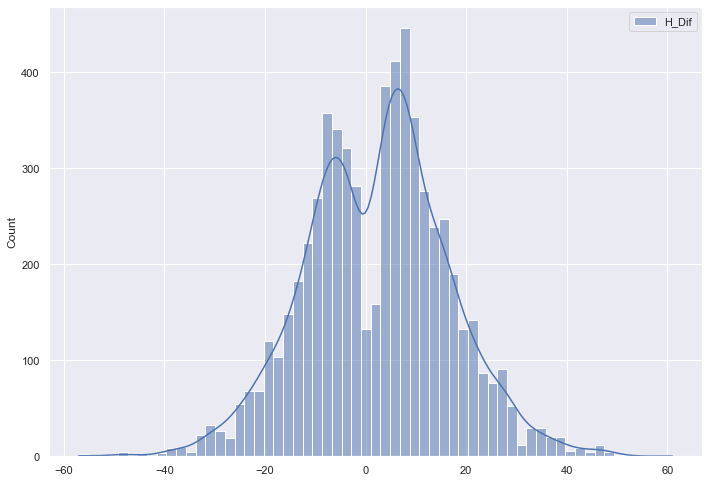

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df[['H_Dif']], multiple="dodge", kde=True)

Có thể thấy, số lượng Home Win (H_Dif > 0) nhiều hơn so với lượng Away Win.

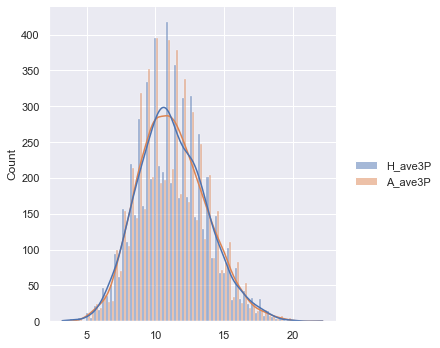

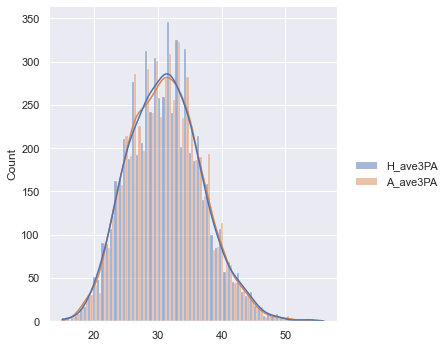

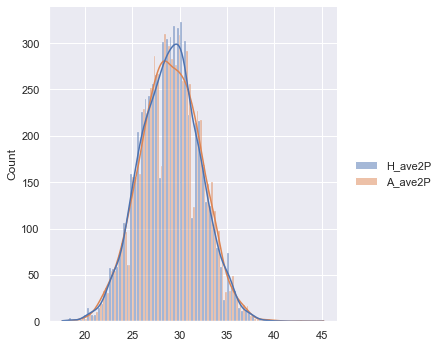

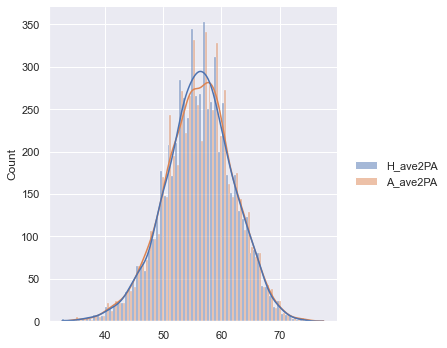

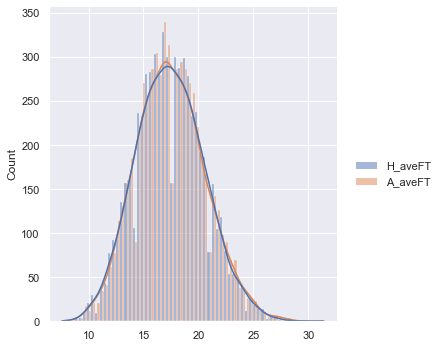

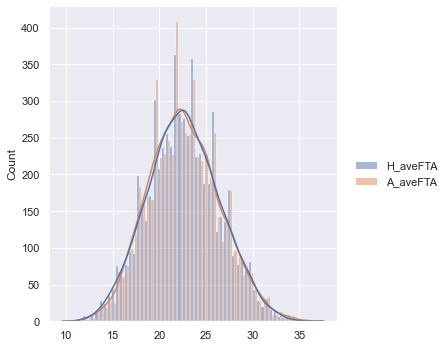

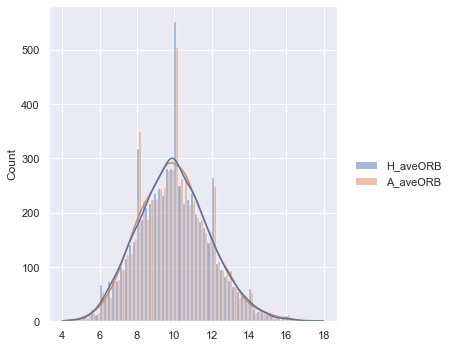

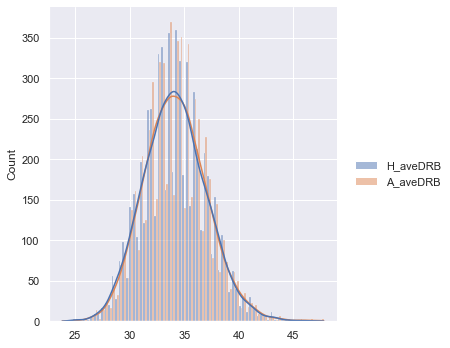

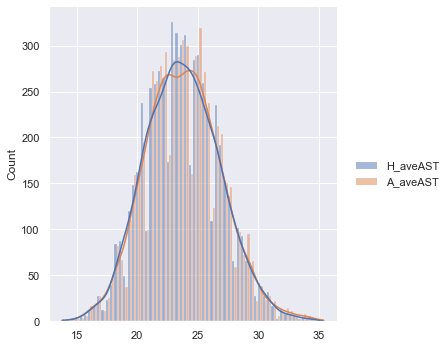

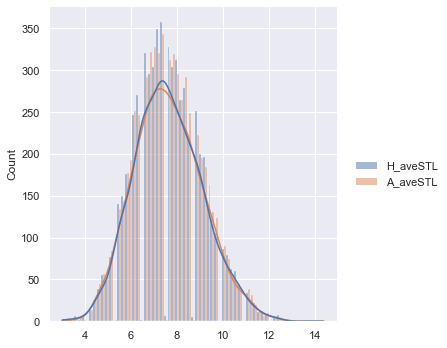

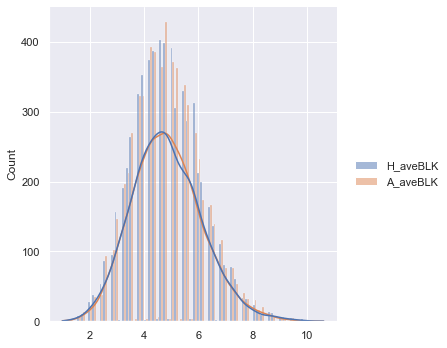

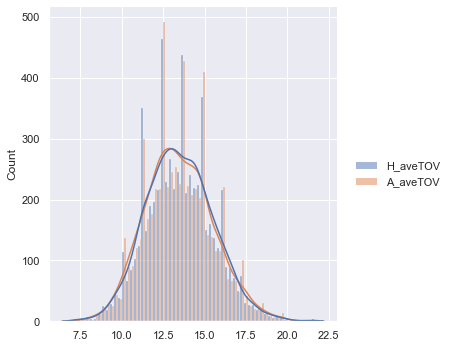

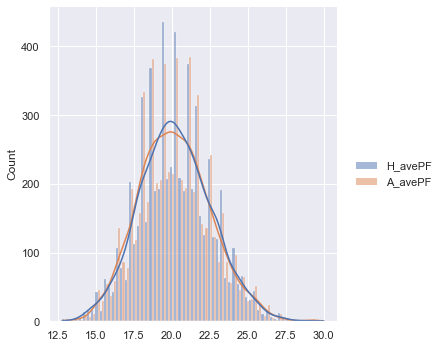

In [29]:
sign = ['H_', 'A_']
lst_display = [[s + 'ave' + c for s in sign] for c in col_name[1:]]

for l in lst_display:
    sns.displot(df[l], multiple="dodge", kde=True)